# Introduction

 As part of my Data Analytics course, I am currently working on a project using a retail dataset sourced from Kaggle.

The dataset comprises three interrelated CSV files, a Features data set.csv, a Stores data-set.csv, and a Sales data-set.csv.
The Features data set which I will start with below contains 12 columns detailing regional and contextual information for each store, including metrics such as temperature, fuel prices, and promotional activity, recorded across various dates.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/inputs/raw/Features data set.csv')
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


There are missing values or NaN in all of the MarkDown columns which I will look at handling by using zero for MarkDown columns which will ensure a stable trend analysis while preserving the logical meaning.  - The use of Median in CPI will provides a more stable central value, keeping our analysis accurate.



In [4]:
df = pd.read_csv('../data/inputs/raw/Features data set.csv')
df.fillna({'CPI': df['CPI'].median(), 'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0}, inplace=True)
df.head()  

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


Next we will look at standardizing the date format ensures consistency which will allow for easier manipulation when analyzing time-based trends in the retail dataset. Also by converting the date format it will ensure correct recognition by Pandas.



In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


Now we will look at converting the numeric columns such as Fuel_Price into a float ensuring accurate analysis and prevent any calculation errors. As it will stop it from being mistakenly stored as a string, where any mathematical operations will fail.

In [6]:
df['Fuel_Price'] = df['Fuel_Price'].astype(float)
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


Lets take a look at an overview of all columns, including their data types and missing values and also to make sure that the fuel price has converted to a float.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


From the dataset above we can see that the Unemployment column has missing values (7605 non-null out of 8190), meaning nearly 7% of the rows are incomplete. We will look at using Median to ensure that the data stays stable and following the same logic we used in CPI above.


In [8]:
df['Unemployment'].fillna(df['Unemployment'].median(), inplace=True)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


Now lets look at removing duplicates, it is important to remove duplicates from datasets to maintain accuracy and reliability of data and not cause inflation of certain values like cost or sales and ensures the data is trustworthy.

In [9]:
df.drop_duplicates(inplace=True)

We have now completed Data cleansing of the Features Data set and have saved as cleaned retail data.

In [10]:
import os

os.makedirs('data/processed', exist_ok=True)

df.to_csv('data/processed/cleaned_retail_data.csv', index=False)

We will now move onto the sales data-set which consists of 5 columns capturing weekly sales figures for each department within each store.

In [11]:
import pandas as pd

In [12]:
sales_df.describe()
sales_df.info()

NameError: name 'sales_df' is not defined

In [ ]:
sales_df = pd.read_csv('../data/inputs/raw/sales data-set.csv')
print(sales_df.head())


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False


As before in Features data set I will begin by checking for missing values.

In [ ]:
sales_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

The results show unlike the Features data set the sales data-set has has zero missing values, we can now move on to stadardizing the Date time format to ensure easier manipulation of data.

Next we will converts Date into a proper datetime format for easy time-based analysis


In [ ]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


To make sure that our weekly sales can be used in calculations,and stored correctly as a float for data integrity and analysis accuracy.

In [ ]:
sales_df['Weekly_Sales'] = sales_df['Weekly_Sales'].astype(float)
sales_df.head()
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


Check the data-set to see if Weekly_Sales has missing values,and then fill them with median like before.



In [ ]:
sales_df['Weekly_Sales'].fillna(sales_df['Weekly_Sales'].median(), inplace=True)
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


We will now look for any identifying and unexpected values that could indicate errors or anomalies in the dataset


In [ ]:
print(sales_df['Dept'].unique())  # See all unique department numbers
print(sales_df['Store'].unique())  # See all unique store IDs

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


Now we can look at detecting and removing any duplicates.

In [ ]:
sales_df.drop_duplicates(inplace=True)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [ ]:
print(sales_df.duplicated().sum())  # Should return 0 if there are no duplicates

0


We will now save this cleaned sales data-set.

In [ ]:
sales_df.to_csv('data/processed/cleaned_sales_data.csv', index=False)

Finally we will work with the last data-set which is the stores data-set which consists of 5 columns capturing weekly sales figures for each department within each store.

In [ ]:
import pandas as pd

stores_df = pd.read_csv('../data/inputs/raw/stores data-set.csv')

# Quick overview
stores_df.info()
stores_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Lets check for missing values if there are any.

In [ ]:
stores_df.isnull().sum()   #0 will be returned for all columns to indicate no missing values

Store    0
Type     0
Size     0
dtype: int64

Lets standardize Type Format to ensure that the type is properly formatted and consistent for example to avoid inconsistencies such as 'A' instead 'a'.


In [ ]:
stores_df['Type'] = stores_df['Type'].str.upper().str.strip()

As before we will check for duplicates.

In [ ]:
stores_df.drop_duplicates(inplace=True)
stores_df.info()
print(stores_df.duplicated().sum())  # Should return 0 if there are no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
0


Now I want to look at scaling store sizes since Size represents store area, I think it's important to normalize it as this scales store sizes between 0 and 1, making it easier to compare across different locations.
It will also help in trend analysis when visualizing store attributes.




In [ ]:
from sklearn.preprocessing import MinMaxScaler




In [ ]:
scaler = MinMaxScaler()
stores_df['Size_scaled'] = scaler.fit_transform(stores_df[['Size']])   

print(stores_df[['Store', 'Size', 'Size_scaled']].head())

   Store    Size  Size_scaled
0      1  151315     0.630267
1      2  202307     0.906277
2      3   37392     0.013624
3      4  205863     0.925525
4      5   34875     0.000000


Now lets save the cleaned stores data-set.


In [ ]:
stores_df.to_csv('data/processed/cleaned_stores_data.csv', index=False)

## Visualisations & Understanding the Data structure

Now lets take time to understand the data structure and start to look at the relationship between the datasets.

In [23]:
import pandas as pd

# Load datasets
features_df = pd.read_csv('../data/inputs/raw/Features data set.csv')
sales_df = pd.read_csv('../data/inputs/raw/Sales data-set.csv')
stores_df = pd.read_csv('../data/inputs/raw/Stores data-set.csv')

# Quick overview of each dataset
print("Features Data:")
print(features_df.info())

print("\nSales Data:")
print(sales_df.info())

print("\nStores Data:")
print(stores_df.info())

Features Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None

Sales Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        ------------

The above results show that we have completed key checks for, Column types (int64, float64, datetime64),  Missing values → features_df.isnull().sum, Consistency across datasets (Do Store & Date match across all files?) and Duplicate values → sales_df.duplicated().sum()




We have now  validated the structure, now we start plotting relationships.


Using Matplotlib & Seaborn we will look at Weekly Sales Over Time

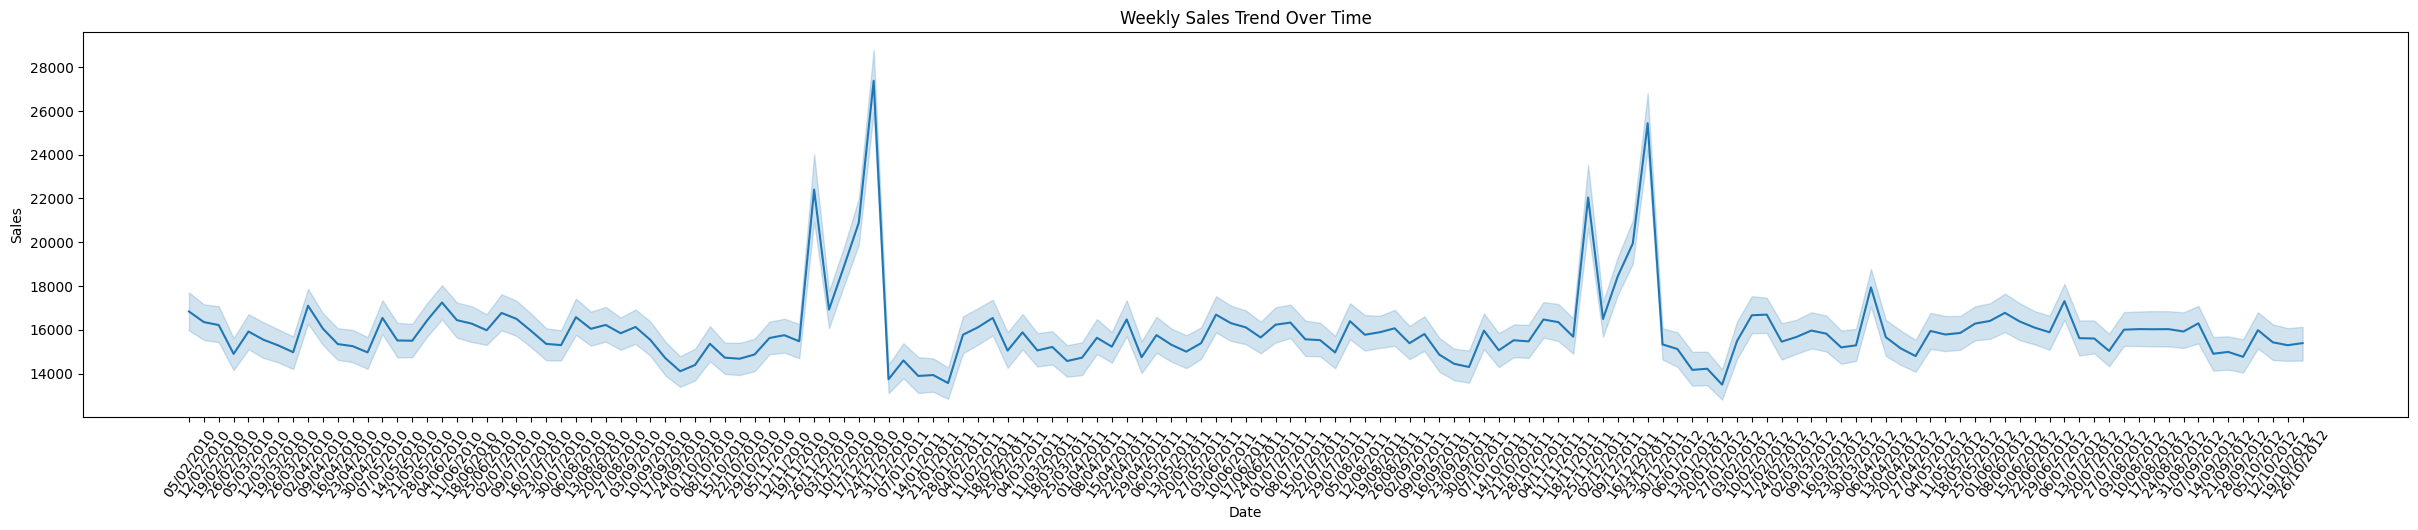

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 5))
sns.lineplot(x=sales_df['Date'], y=sales_df['Weekly_Sales'])
plt.title("Weekly Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=55)
plt.show()

The above lineplot shows fluctuations in sales over time and it will help to detect seasonal trends.


Next we will look at how many stores belong to each category (A, B, C)

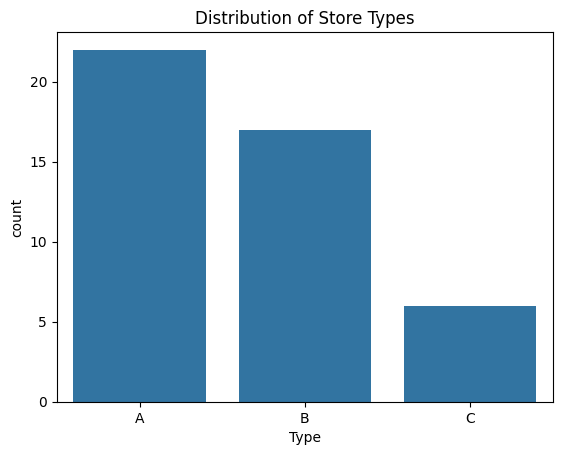

In [34]:
sns.countplot(x=stores_df['Type'])
plt.title("Distribution of Store Types")
plt.show()

We are now going to develop basic Charts and Graphs for Key Metrics such as Store Size Comparison, this will help to visualize how store sizes vary across locations.


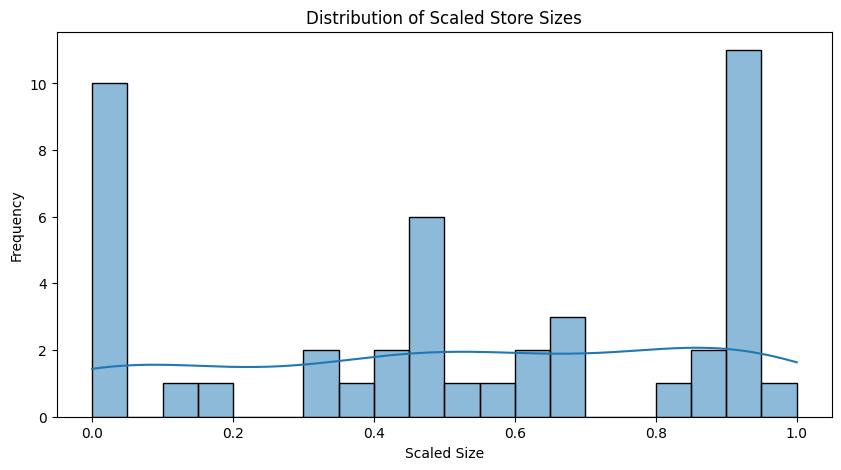

In [36]:
from sklearn.preprocessing import MinMaxScaler

if 'Size_scaled' not in stores_df.columns:
	scaler = MinMaxScaler()
	stores_df['Size_scaled'] = scaler.fit_transform(stores_df[['Size']])

plt.figure(figsize=(10, 5))
sns.histplot(stores_df['Size_scaled'], bins=20, kde=True)
plt.title("Distribution of Scaled Store Sizes")
plt.xlabel("Scaled Size")
plt.ylabel("Frequency")
plt.show()